# Assignment 2

**name: Hirendhar Ramkumar**

**email: hr222rs@student.lnu.se**

In this Assignment, you will use Python to handle several exercises related to gradient descent, linear regression, logistic regression, etc.
All exercises are individual. 
We expect you to submit a Jupyter Notebook (i.e., pre-organized and provided through Moodle) and the .py files with the classes’ exercise implementations. 
Your submission should include all the datasets and files we need to run your programs (we will run your notebook). 
When grading your assignments, we will, in addition to functionality, also take into account code quality. 
We expect well-structured and efficient solutions.

In this assignment, you must implement all models as subclasses of MachineLearning-
Model. 
Since the class MachineLearningModel provides the abstract methods fit, predict,
and evaluate, your implementations should provide implementations for such methods.
Please check the documentation of MachineLearningModel to understand what these methods
should do, as well as what their input parameters are and what they should return as results.
You must also implement the classes DecisionBoundary, ROCAnalysis, and ForwardSelection
provided to you. 
Please check their documentation to understand what these methods
should do, what their input parameters are, and what they should return as results. All your
implementations of such classes will be used throughout this assignment.

## Lecture 2 - Linear and Polynomial Regression

### Guidelines for model implementation (Mandatory)

1. Implement a class **RegressionModelNormalEquation** that implements the abstract
class **MachineLearningModel**. All methods should be implemented and properly documented.
This class must work for polynomials of any degree (i.e., an input parameter that
must be captured in the class constructor).

2. Implement a class **RegressionModelGradientDescent** that implements the abstract
class **MachineLearningModel**. All methods should be implemented and properly documented.
This class must work for polynomials of any degree and receive other parameters
such as the learning rate and number of iterations.

3. Both implementations should be vectorized. When implementing these classes, your
vector β should start with all values as 0. In implementing the fit() method, ensure
you track how the cost function evolved over the number of iterations (i.e., store it in an
array you can retrieve after the model is built). This will be needed later in the assignment.

### Validation of your model implementation (1-4 Mandatory, 5-6 Non-mandatory)

1. **(Mandatory)** In this part, you will use a reduced version of the Boston Housing Dataset (housingboston.csv). We will use the first two input variables as the features in this part of the assignment. The last variable is the value to predict.
* **INDUS:** proportion of nonretail business acres per town.
* **RM:** average number of rooms per dwelling.
* **MEDV:** Median value of owner-occupied homes in $1,000s.

Read the dataset and store the values as vectors in the variables $X_e$ and $y$. For this part of the assignment, the degree of the polynomial for your models must be 1.

In [18]:
import numpy as np
from MachineLearningModel import RegressionModelNormalEquation

def load_and_process_data(file_path: str) -> tuple:
    """
    Loads and processes data from a CSV file.

    Args:
        file_path (str): Path to the CSV file.

    Returns:
        tuple: (features, target) where features is a 2D array and target is a 1D array.
    """
    try:
        # Load CSV file
        csv_data = np.genfromtxt(
            file_path,
            dtype=np.float64,
            delimiter=",",
            skip_header=1
        )
        # Extract features (first two columns) and target (third column)
        features = csv_data[:, :2]
        target = csv_data[:, 2]
        return features, target
    except Exception as e:
        raise ValueError(f"Error loading CSV file: {e}")

def train_and_evaluate_model(features: np.ndarray, target: np.ndarray) -> float:
    """
    Trains a regression model and evaluates its performance using MSE.

    Args:
        features (np.ndarray): Feature matrix of shape (n_samples, n_features).
        target (np.ndarray): Target values of shape (n_samples,).

    Returns:
        float: Mean Squared Error (MSE) of the model's predictions.
    """
    # Initialize and train the model
    model = RegressionModelNormalEquation(degree=1)
    model.fit(features, target)
    
    # Make predictions
    predictions = model.predict(features)
    
    # Evaluate model performance
    mse = model.evaluate(predictions, target)
    return mse

def main():
    """Main function to execute the training and evaluation pipeline."""
    try:
        # Load data
        file_path = "datasets/housing-boston.csv"
        features, target = load_and_process_data(file_path)
        
        # Train and evaluate model
        mse = train_and_evaluate_model(features, target)
        
        # Output result
        print(f"MSE = {mse:}")
        
    except Exception as e:
        print(f"An error occurred: {e}")

if __name__ == "__main__":
    main()

MSE = 39.14548321146509


2. **(Mandatory)** Plot the dataset. You must plot two figures side by side (e g., use the subplot method), with the predicted value as the $y-axis$ and each variable on the $x-axis$. 

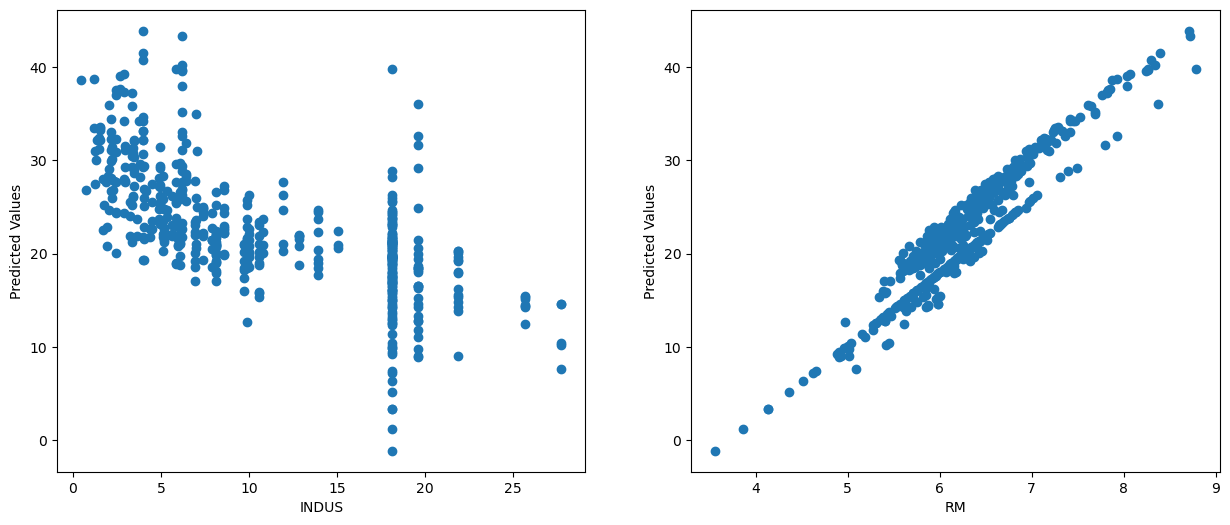

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from MachineLearningModel import RegressionModelNormalEquation

# Load the dataset
csv = np.genfromtxt("datasets/housing-boston.csv", dtype=np.float64, delimiter=",")
data = csv[1:, :2]  # Features: INDUS and RM
target = csv[1:, 2]  # Target variable

# Train the model
model = RegressionModelNormalEquation(1)
model.fit(data, target)
y_predict = model.predict(data)

# Create subplots
plt.figure(figsize=(15, 6))

# Plot for INDUS vs predictions
plt.subplot(1, 2, 1)
plt.xlabel("INDUS")
plt.ylabel("Predicted Values")
plt.scatter(data[:, 0], y_predict)

# Plot for RM vs predictions
plt.subplot(1, 2, 2)
plt.xlabel("RM")
plt.ylabel("Predicted Values")
plt.scatter(data[:, 1], y_predict)

plt.show()

3. **(Mandatory)** Use your implementation of the regression model with the normal equation (RegressionModelNormalEquation) and report:

* The values for $\beta$. 

* The cost.

* The predicted value for an instance with values for INDUS and TAX equals to $,$, respectively.


In [20]:
import numpy as np
from MachineLearningModel import RegressionModelNormalEquation

# Load the dataset
csv = np.genfromtxt("datasets/housing-boston.csv", dtype=np.float64, delimiter=",")
data = csv[1:, :2]  # Features: INDUS and RM
target = csv[1:, 2]  # Target variable

# Train the model
model = RegressionModelNormalEquation(1)
model.fit(data, target)

# Generate predictions and evaluate
y_predict = model.predict(data)
evaluated = model.evaluate(y_predict, target)

# Print model betas
print(f"Betas = {model.betas}")

# Predict for a specific point
point = [[2.31, 6.575]]
predicted_y = model.predict(point)

# Print results
print(f"MSE = {evaluated}")
print(f"Predicted point = {predicted_y}")

Betas = [-22.89831573  -0.33471389   7.82205511]
MSE = 39.14548321146509
Predicted point = [27.75850755]


4. **(Mandatory)** Now, normalize the input features, run the regression model with the normal equation, and report the same items. 
The predicted values for this experiment should be the same, but the $\beta$ values change. Why?

---- Your answers here ----


The predicted values remain the same because normalization does not affect the linear relationship between the features and the target variable, as it only scales the input data. However, the β values change because normalization adjusts the scale of the features, leading to different coefficients that compensate for the scaled inputs while maintaining the same predictions when the model is applied to the normalized data.

In [ ]:
import numpy as np
from MachineLearningModel import RegressionModelNormalEquation
from array_normalizer import normalize_2d
# Load the dataset
csv = np.genfromtxt("datasets/housing-boston.csv", dtype=np.float64, delimiter=",")
data = csv[1:, :2]  # Features: INDUS and RM
target = csv[1:, 2]  # Target variable

# Normalize the data
normalized_data = normalize_2d(data)

# Train the model on normalized data
model = RegressionModelNormalEquation(1)
model.fit(normalized_data, target)

# Generate predictions and evaluate
normalized_predicted_y = model.predict(normalized_data)
normalized_mse = model.evaluate(normalized_predicted_y, target)

# Print results
print(f"Normalized mse = {normalized_mse}")
print(f"Betas after normalization = {model.betas}")

Normalized mse 39.14548321146509
Betas after normalization [22.53280632 -2.29398525  5.49047659]


5. **(Non-Mandatory)** Now, you will work with your implementation of the gradient descent for any degree polynomial. In this part, you must compare how the cost function evolves by using your model using a non-normalized and a normalized instance of your RegressionModelGradientDescen class. 
    * You must plot two figures (e.g., use subplots) side by side to show how the cost evolves over 3000 iterations with a learning rate of $0.001$ using and not using feature normalization. 
    * Describe what is happening and why this happens (i.e., using or not normalization).        
    

---- Your answers here ----

In the plots, the cost function for normalized data decreases more smoothly and converges faster compared to non-normalized data. This happens because normalization scales the features to a similar range, preventing the gradient descent from being dominated by features with larger values (e.g., INDUS vs. RM). Without normalization, the larger feature values can lead to unstable or slow convergence, as seen in the erratic and slower decline of the MSE in the non-normalized plot.

Normalized mse 39.15065819285329
Betas after normalization [22.47728764 -2.33452613  5.44811689]
Non-normalized MSE 43.587629339041186
Normalized MSE 39.15065819285329


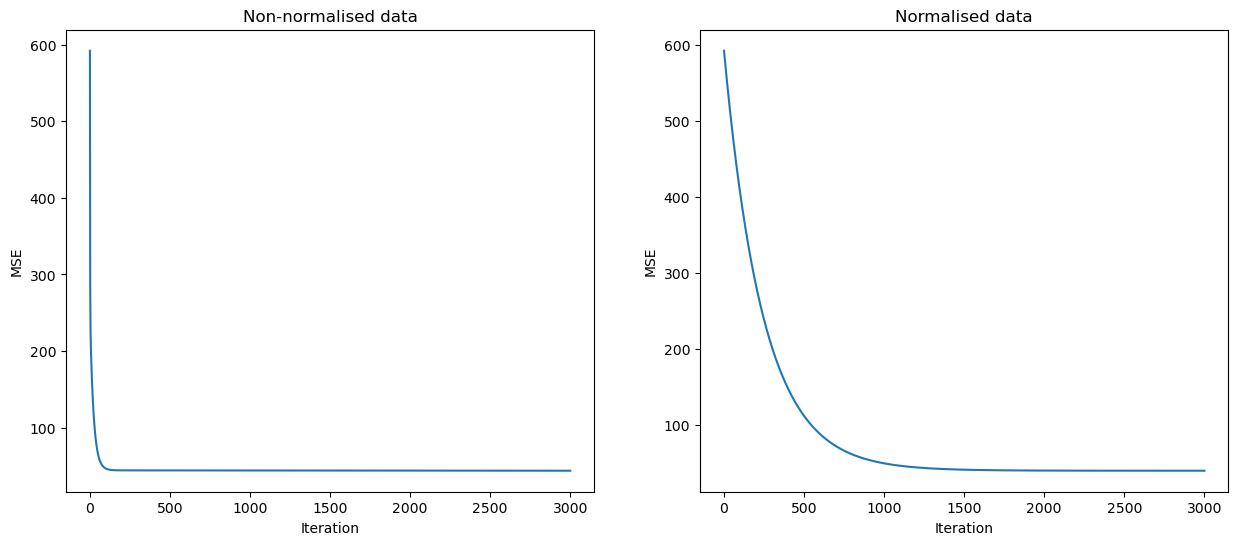

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from MachineLearningModel import RegressionModelGradientDescent
from array_normalizer import normalize_2d

# Load the dataset
csv = np.genfromtxt("datasets/housing-boston.csv", dtype=np.float64, delimiter=",")
data = csv[1:, :2]  # Features: INDUS and RM
target = csv[1:, 2]  # Target variable

# Normalize the data
normalized_data = normalize_2d(data)

# Initialize the model
model = RegressionModelGradientDescent(1, learning_rate=0.001, num_iterations=3000)

# Train and evaluate on normalized data (first pass)
model.fit(normalized_data, target)
normalized_predicted_y = model.predict(normalized_data)
normalized_mse = model.evaluate(normalized_predicted_y, target)
print(f"Normalized mse {normalized_mse}")
print(f"Betas after normalization {model.betas}")

# Train and evaluate on non-normalized data
model.fit(data, target)
non_normalised_cost_per_iteration = model.cost_per_iteration
y_predicted = model.predict(data)
non_normalized_MSE = model.evaluate(y_predicted, target)
print(f"Non-normalized MSE {non_normalized_MSE}")

# Train and evaluate on normalized data (second pass)
model.fit(normalized_data, target)
normalised_cost_per_iteration = model.cost_per_iteration
normalized_y_predicted = model.predict(normalized_data)
normalized_MSE = model.evaluate(normalized_y_predicted, target)
print(f"Normalized MSE {normalized_MSE}")

# Plot cost per iteration
plt.figure(figsize=(15, 6))

# Plot for non-normalized data
plt.subplot(1, 2, 1)
plt.title("Non-normalised data")
plt.xlabel("Iteration")
plt.ylabel("MSE")
plt.plot(range(1, len(non_normalised_cost_per_iteration)+1), non_normalised_cost_per_iteration)

# Plot for normalized data
plt.subplot(1, 2, 2)
plt.title("Normalised data")
plt.xlabel("Iteration")
plt.ylabel("MSE")
plt.plot(range(1, len(normalised_cost_per_iteration)+1), normalised_cost_per_iteration)

plt.show()

6. **(Non-Mandatory)** Finally, find and plot a figure with the hyperparameter's learning rate and the number of iterations (using the normalized version) such that you get within a difference of 1\% of the final cost for the normal equation using this dataset.

--- Your answer here --- 

The plots show that the MSE decreases with increasing iterations, stabilizing around 39.15 after approximately 2500 iterations, close to the normal equation's final MSE of 39.15065819285329. The MSE per learning rate increases sharply beyond 0.001, indicating that a learning rate around 0.001 with 2500-3000 iterations achieves a cost within 1% of the normal equation result, as higher learning rates lead to divergence.

Final iteration MSE: 39.15065819285329
Maximum learning rate MSE: 0.001, lr: 39.15065819285329


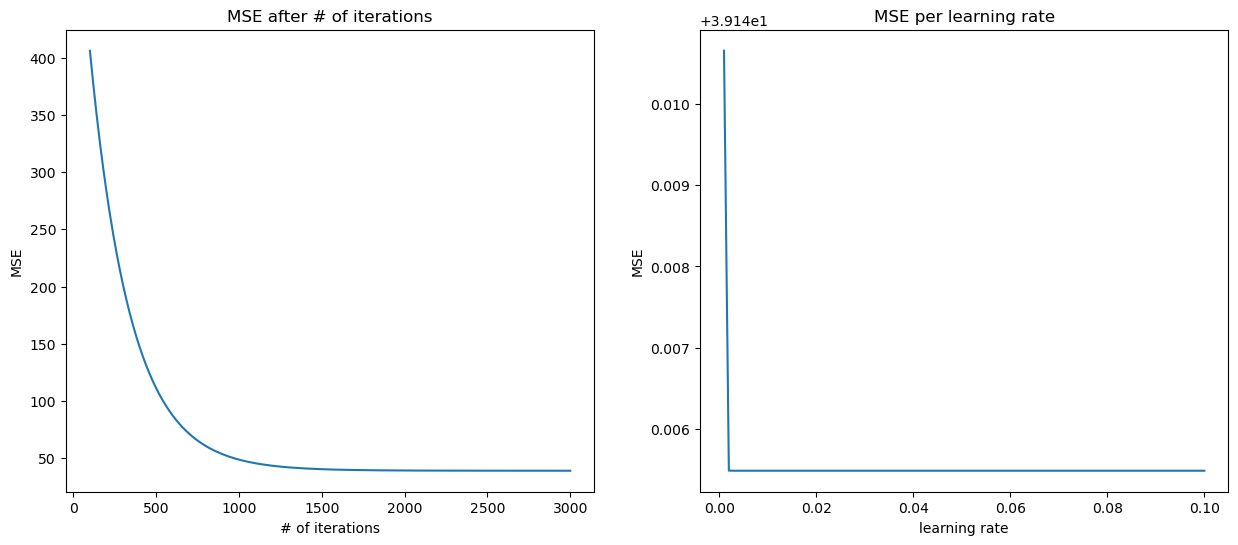

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from MachineLearningModel import RegressionModelGradientDescent
from array_normalizer import normalize_2d

# Load and normalize the dataset
csv = np.genfromtxt("datasets/housing-boston.csv", dtype=np.float64, delimiter=",")
data = csv[1:, :2]  # Features: INDUS and RM
target = csv[1:, 2]  # Target variable
normalized_data = normalize_2d(data)

# Evaluate MSE across different iteration counts
iteration_mse = []
for i in range(100, 3001, 20):
    model = RegressionModelGradientDescent(1, learning_rate=0.001, num_iterations=i)
    model.fit(normalized_data, target)
    y_predicted = model.predict(normalized_data)
    iteration_mse.append(model.evaluate(y_predicted, target))
print(f"Final iteration MSE: {iteration_mse[-1]}")

# Evaluate MSE across different learning rates
learning_rate_mse = []
learning_rates = np.linspace(0.001, 0.1, 100)
for lr in learning_rates:
    model = RegressionModelGradientDescent(1, learning_rate=lr, num_iterations=3000)
    model.fit(normalized_data, target)
    y_predicted = model.predict(normalized_data)
    learning_rate_mse.append((lr, model.evaluate(y_predicted, target).item()))
print(f"Maximum learning rate MSE: {max(learning_rate_mse, key=lambda x:x[1])[0]}, lr: {max(learning_rate_mse, key=lambda x:x[1])[1]}")
learning_rate_mse = np.array(learning_rate_mse)

# Plot results
plt.figure(figsize=(15, 6))

# Plot MSE vs. number of iterations
plt.subplot(1, 2, 1)
plt.title("MSE after # of iterations")
plt.xlabel("# of iterations")
plt.ylabel("MSE")
plt.plot(range(100, 3001, 20), iteration_mse)

# Plot MSE vs. learning rate
plt.subplot(1, 2, 2)
plt.title("MSE per learning rate")
plt.xlabel("learning rate")
plt.ylabel("MSE")
plt.plot(learning_rate_mse[:,0], learning_rate_mse[:,1])

plt.show()

## Lecture 2 - Testing your Multivariate Regression Model (1-2 Mandatory, 3 Non-mandatory)

In this exercise, we will use the file secret_polynomial.csv. The data consists of 400 x, y points generated from a polynomial with some Gaussian noise added.

1. **(Mandatory)** Start by creating a procedure to split the dataset into training and test sets. The proportion must be 80% for training and 20% for testing. Show your procedure working by plotting a figure with 3 subplots. The first plot must be the dataset with all data. The second must be the training set and the third the test set. 


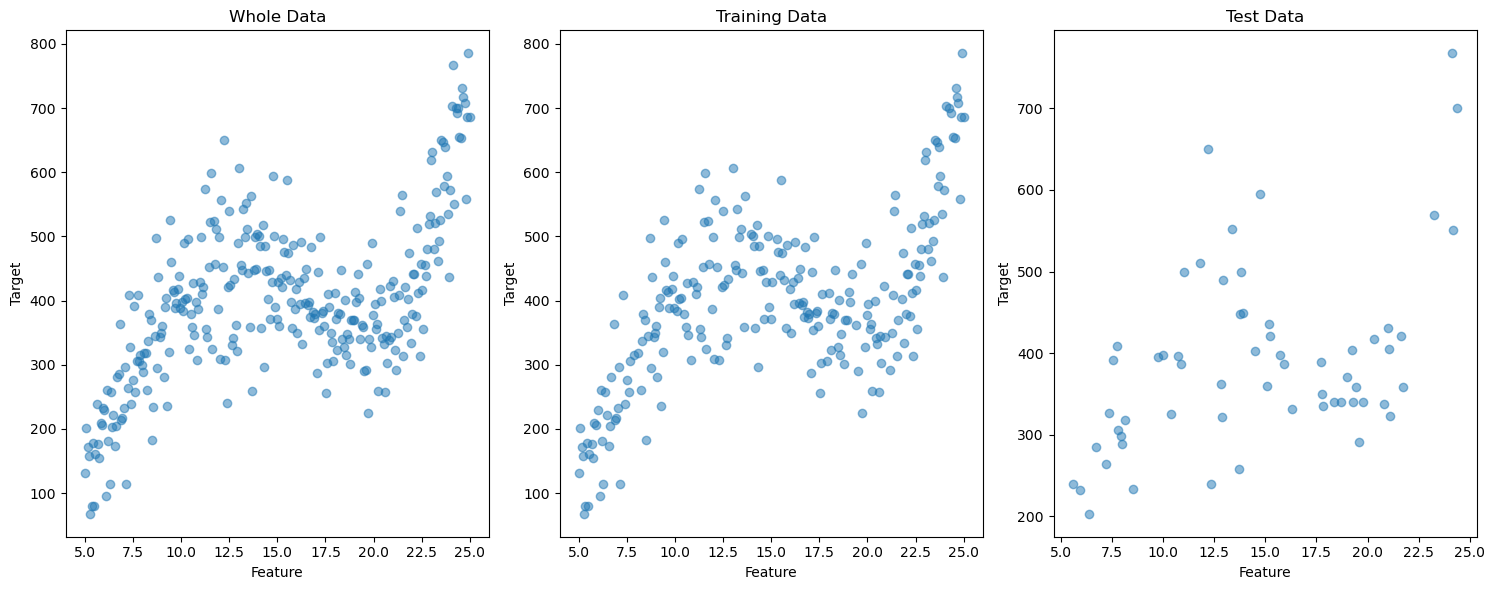

In [24]:
import numpy as np
import matplotlib.pyplot as plt

# Load dataset
data_file = np.genfromtxt("datasets/secret_polynomial.csv", dtype=np.float64, delimiter=",")
features = data_file[1:, 0]  # Feature column
targets = data_file[1:, 1]   # Target column

# Shuffle indices and split into 80% training, 20% test
indices = np.random.permutation(len(features))
split_point = round(0.8 * len(features))
train_idx, test_idx = indices[:split_point], indices[split_point:]
train_features, train_targets = features[train_idx], targets[train_idx]
test_features, test_targets = features[test_idx], targets[test_idx]

# Create subplots
plt.figure(figsize=(15, 6))

# Plot whole dataset
plt.subplot(1, 3, 1)
plt.title("Whole Data")
plt.xlabel("Feature")
plt.ylabel("Target")
plt.scatter(features, targets, alpha=0.5)

# Plot training data
plt.subplot(1, 3, 2)
plt.title("Training Data")
plt.xlabel("Feature")
plt.ylabel("Target")
plt.scatter(train_features, train_targets, alpha=0.5)

# Plot test data
plt.subplot(1, 3, 3)
plt.title("Test Data")
plt.xlabel("Feature")
plt.ylabel("Target")
plt.scatter(test_features, test_targets, alpha=0.5)

plt.tight_layout()
plt.show()#--- Write your code here ---#

2. **(Mandatory)** Now fit and plot (e.g., using subplots) all polynomial models for degrees $d\in [1,6]$. Observe your figure and decide which degree gives the best fit. Motivate your answer.

--- Your answer here --- 

The best fit is achieved with a polynomial degree of 1, as it has the lowest MSE of 1302917.20. Higher degrees (2 to 6) show increasing MSE values and more complex curves that overfit the data, deviating significantly from the test data points, especially at the extremes. The degree 1 model provides a simpler, more generalizable linear fit that aligns well with the overall trend of the data.

Degree 1 MSE: 1302917.2020851455
Degree 2 MSE: 1311065.4529675655
Degree 3 MSE: 1733299.219565558
Degree 4 MSE: 1802109.9222367257
Degree 5 MSE: 1815691.22318743
Degree 6 MSE: 1836618.3502182616


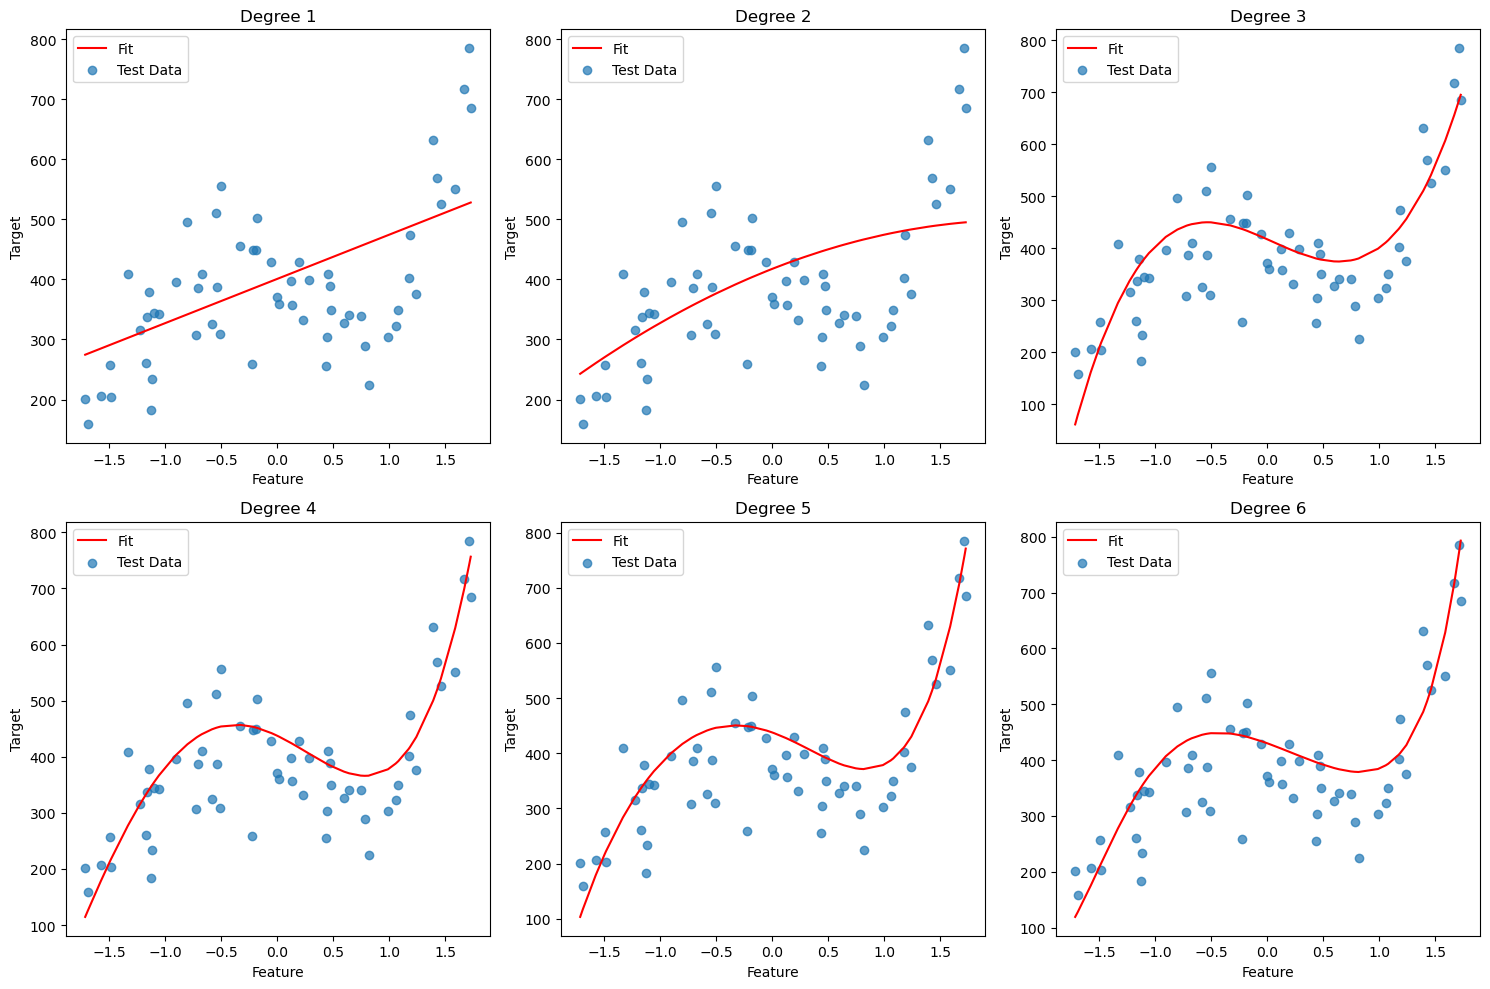

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from MachineLearningModel import RegressionModelGradientDescent
from array_normalizer import normalize_2d
from array_normalizer import create_split


# Load the dataset
data_file = np.genfromtxt("datasets/secret_polynomial.csv", dtype=np.float64, delimiter=",")
whole_data = data_file[1:, 0]  # Feature
whole_target = data_file[1:, 1]  # Target

# Normalize the data
normalized_data = normalize_2d(whole_data.reshape(-1, 1))

# Split into training and test sets
X_train, y_train, X_test, y_test = create_split(normalized_data, whole_target)

# Initialize plot
plt.figure(figsize=(15, 10))

# Train and evaluate models for degrees 1 to 6
for i in range(1, 7):
    # Initialize and train model
    model = RegressionModelGradientDescent(i, learning_rate=0.01, num_iterations=3000)
    model.fit(X_train, y_train)
    
    # Predict and evaluate on test set
    normalized_y_predicted = model.predict(X_test)
    mse = model.evaluate(normalized_y_predicted, y_test)
    print(f"Degree {i} MSE: {mse}")
    
    # Plot test data and fitted polynomial
    plt.subplot(2, 3, i)
    plt.title(f"Degree {i}")
    plt.xlabel("Feature")
    plt.ylabel("Target")
    
    # Sort data for smooth polynomial curve
    sorted_indices = X_test[:, 0].argsort()
    plt.plot(X_test[sorted_indices], normalized_y_predicted[sorted_indices], color="red", label="Fit")
    plt.scatter(X_test, y_test, alpha=0.7, label="Test Data")
    plt.legend()

plt.tight_layout()
plt.show()

3. **(Non-Mandatory)** To increase the confidence of your answer, you must divide the data into training and test sets and make repeated runs with shuffled data (at least 20 runs). You must decide on the best way to make this decision. By using this approach, what is your decision and why? 

--- Your answer here --- 

Based on the repeated runs, the best polynomial degree is 1, as it has the lowest mean MSE of approximately 1302917.20 with a negligible standard deviation, indicating consistent performance across 20 runs. Higher degrees (2 to 6) show increasing mean MSE values, with degree 2 at 1311065.45 and degrees 3 to 6 ranging from 1733299.22 to 1836618.35, suggesting overfitting. The low standard deviations across all degrees indicate stable results, but the significant increase in MSE with higher degrees confirms that degree 1 provides the most reliable and accurate fit for the data.


--- MSE Summary Over 20 Runs ---
Degree 1: Mean MSE = 1302917.2020851453, Std = 2.3283064365386963e-10
Degree 2: Mean MSE = 1311065.4529675655, Std = 0.0
Degree 3: Mean MSE = 1733299.219565558, Std = 0.0
Degree 4: Mean MSE = 1802109.9222367257, Std = 0.0
Degree 5: Mean MSE = 1815691.2231874303, Std = 2.3283064365386963e-10
Degree 6: Mean MSE = 1836618.3502182614, Std = 2.3283064365386963e-10


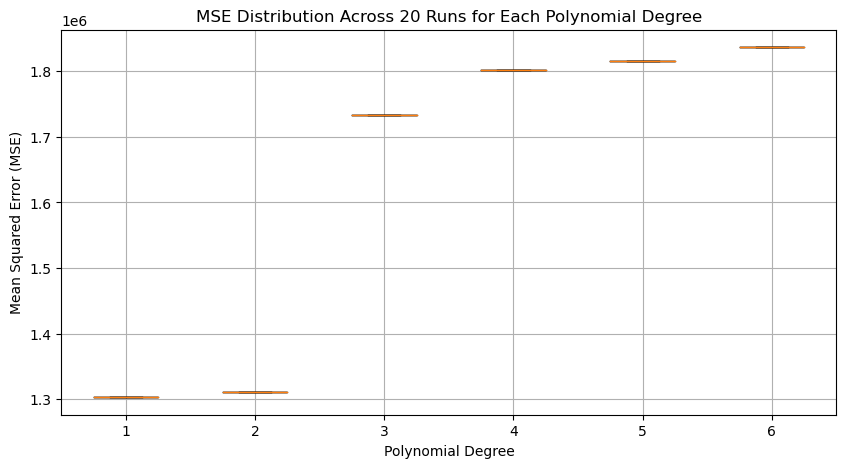

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from MachineLearningModel import RegressionModelGradientDescent
from array_normalizer import normalize_2d
from array_normalizer import create_split

# Load and normalize data
data_file = np.genfromtxt("datasets/secret_polynomial.csv", dtype=np.float64, delimiter=",")
whole_data = data_file[1:, 0]
whole_target = data_file[1:, 1]
normalized_data = normalize_2d(whole_data.reshape(-1, 1))

# Set parameters
degrees = range(1, 7)
num_runs = 20
mse_results = {d: [] for d in degrees}

# Repeated experiments
for run in range(num_runs):
    X_train, y_train, X_test, y_test = create_split(normalized_data, whole_target)

    for degree in degrees:
        model = RegressionModelGradientDescent(degree, learning_rate=0.01, num_iterations=3000)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        mse = model.evaluate(y_pred, y_test)
        mse_results[degree].append(mse)

# Summary: Mean and Std of MSE per degree
print("\n--- MSE Summary Over 20 Runs ---")
for degree in degrees:
    errors = mse_results[degree]
    mean_mse = np.mean(errors)
    std_mse = np.std(errors)
    print(f"Degree {degree}: Mean MSE = {mean_mse:}, Std = {std_mse:}")

# Plot boxplot of MSEs
plt.figure(figsize=(10, 5))
plt.boxplot([mse_results[d] for d in degrees], labels=[str(d) for d in degrees])
plt.title("MSE Distribution Across 20 Runs for Each Polynomial Degree")
plt.xlabel("Polynomial Degree")
plt.ylabel("Mean Squared Error (MSE)")
plt.grid(True)
plt.show()

## Lecture 3 - Logistic Regression

### Guidelines for model implementation (Mandatory)

1. Implement a class LogisticRegressionModel that implements the abstract class MachineLearningModel.
All methods should be implemented and properly documented.
This class receives parameters such as the learning rate and number of iterations. This
class should be implemented in a way that works for two classes only (i.e., 0 or 1).

2. Implement a class NonLinearLogisticRegressionModel that implements the abstract
class MachineLearningModel. All methods should be implemented and properly documented.
This class must work for polynomials of any degree and receive other parameters
such as the learning rate and number of iterations. This class should work for only two
input variables (e.g., X1 and X2, as discussed in class). This class should be implemented
in a way that works for two classes only (i.e., 0 or 1).

3. Both implementations should be vectorized. When implementing these classes, your vector
β should start with all values as 0. In your implementation of the evaluate function, ensure
you keep track of how the cost function evolved over the number of iterations. This will
be needed later in the assignment.

4. Remember that log(0) = undefined. Therefore, you may add a term epsilon = 1e-15 to
prevent this in using the np.log() function. Simply add this term inside the function, and
you will avoid such errors.

### Using your Implementations for the LogisticRegressionModel and the NonLinearLogisticRegressionModel (1-3 Mandatory, 4-6 Non-mandatory)

You will now try to classify bank notes as fake (0) or not (1). This dataset banknote_authentication.csv contains 1372 observations and has 2 features and (in column 3) binary labels of either fake (0) or not (1). Feature data were extracted using a Wavelet Transform tool from images of both fake and non-fake banknotes.

1. **(Mandatory)** Read and normalize the data. Plot the 2 variables in the x and y-axis. Use different colors to plot the classes (i.e., 0 or 1). You should plot two series to obtain this figure.  

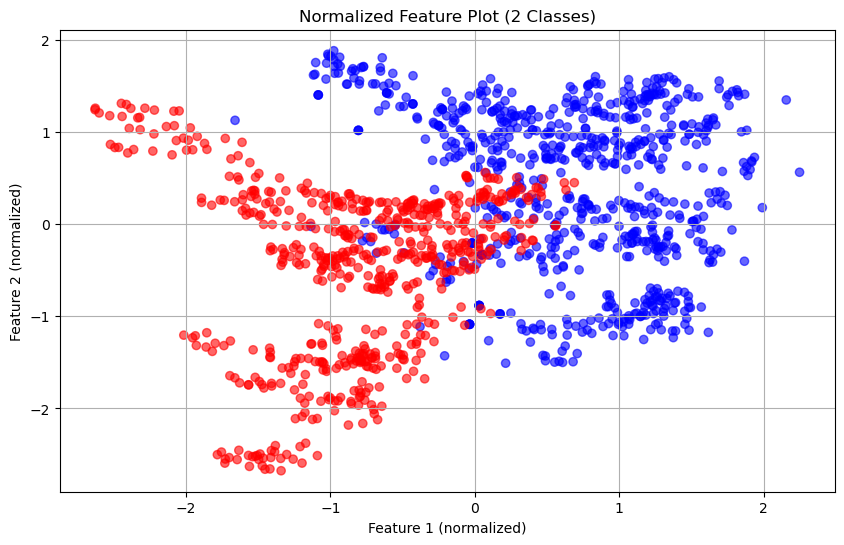

In [29]:
# step1_plot_normalized_data.py

import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Load the dataset
data = np.genfromtxt("datasets/banknote_authentication.csv", delimiter=",", dtype=np.float64)

# Extract the first two features and target
features = data[:, :2]
target = data[:, 2].reshape(-1, 1)

# Normalize the features
scaler = StandardScaler()
normalized_features = scaler.fit_transform(features)

# Plot the features with class colors
plt.figure(figsize=(10, 6))
plt.scatter(normalized_features[:, 0], normalized_features[:, 1],
            c=target.ravel(), cmap='bwr', alpha=0.6)
plt.title("Normalized Feature Plot (2 Classes)")
plt.xlabel("Feature 1 (normalized)")
plt.ylabel("Feature 2 (normalized)")
plt.grid(True)
plt.show()

# Save data for the next script
np.savez("normalized_data.npz", features=normalized_features, target=target)


2. **(Mandatory)** Separate a validation set with 20\% of the data. We will call the remaining 80\% a sub-dataset.

In [30]:
import numpy as np

# Load the normalized features and target from the first script
data = np.load("normalized_data.npz")
normalized_features = data["features"]
target = data["target"]

# Set seed for reproducibility
np.random.seed(42)

# Shuffle the dataset
random_indices = np.random.permutation(len(normalized_features))

# Compute 80% split point
split_point = int(0.8 * len(normalized_features))

# Split the data
sub_bank_feature = normalized_features[random_indices[:split_point]]
sub_bank_target = target[random_indices[:split_point]]
val_bank_feature = normalized_features[random_indices[split_point:]]
val_bank_target = target[random_indices[split_point:]]

# Print sizes
print("Sub-dataset size:", sub_bank_feature.shape[0])
print("Validation set size:", val_bank_feature.shape[0])

# Optionally save these sets for later use
np.savez("split_data.npz",
         sub_features=sub_bank_feature, sub_target=sub_bank_target,
         val_features=val_bank_feature, val_target=val_bank_target)


Sub-dataset size: 1097
Validation set size: 275


3. **(Mandatory)** Your task now is to decide on a learning rate and the number of iterations that would work well for your implementations of the LogisticRegression and your NonLinearLogisticRegression. The degree for the NonLinearLogisticRegression model must be 2. Create a figure for each model showing the learning rate and number of iterations and plot the cost function $J(\beta)$ as a function over iterations. This approach must use the sub-dataset (the 80\%) from step 2. Discuss your choice for an appropriate learning rate and the number of iterations.

--- Your answer here --- 

The plots show that both linear and nonlinear logistic regression models converge with a learning rate of 0.3 and 2000 iterations. The linear model's cost drops from 0.718 to 0.2646 and stabilizes, while the nonlinear model's cost decreases from 0.6931 to 0.1853, indicating a slightly better fit due to the degree-2 polynomial. An appropriate choice is a learning rate of 0.3, as it ensures convergence without oscillation, and 2000 iterations, as the cost stabilizes well before this point, balancing efficiency and accuracy.

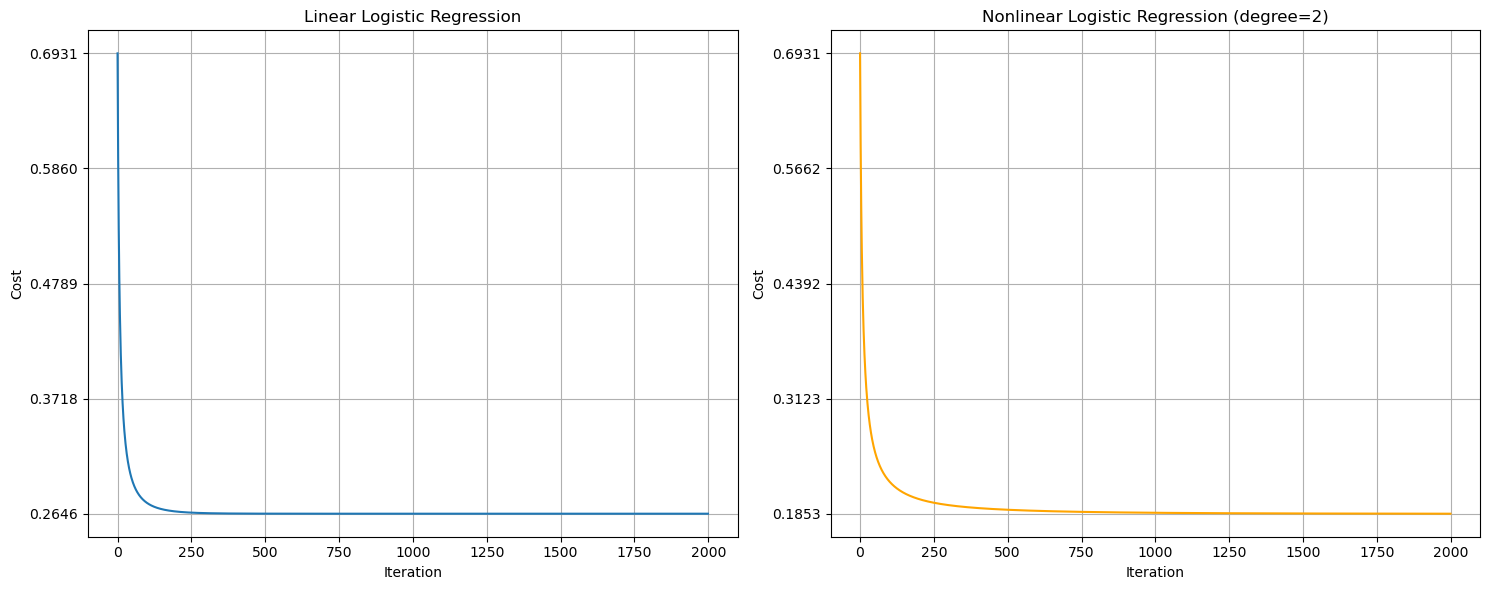

Linear Logistic Regression Evaluation: 0.8981818181818182
Nonlinear Logistic Regression Evaluation: 0.9309090909090909


In [31]:
from MachineLearningModel import LogisticRegression, NonLinearLogisticRegression
import numpy as np
import matplotlib.pyplot as plt

# Initialize models
log_reg = LogisticRegression(learning_rate=0.3, num_iterations=2000)
nonlin_log_reg = NonLinearLogisticRegression(degree=2, learning_rate=0.3, num_iterations=2000)

# Fit linear logistic regression
log_reg.fit(sub_bank_feature, sub_bank_target)
predicted_y_lin = log_reg.predict(val_bank_feature)
eval_lin = log_reg.evaluate(predicted_y_lin, val_bank_target)
lin_cost = np.array(log_reg.cost_per_iteration).flatten()

# Fit nonlinear logistic regression
nonlin_log_reg.fit(sub_bank_feature, sub_bank_target)
predicted_y_nonlin = nonlin_log_reg.predict(val_bank_feature)
eval_nonlin = nonlin_log_reg.evaluate(predicted_y_nonlin, val_bank_target)
nonlin_cost = np.array(nonlin_log_reg.cost_per_iteration).flatten()

# Set y-axis ticks for better readability
lin_y_ticks = np.linspace(lin_cost.min(), lin_cost.max(), num=5)
nonlin_y_ticks = np.linspace(nonlin_cost.min(), nonlin_cost.max(), num=5)

# Plotting
plt.figure(figsize=(15, 6))

# Linear model cost plot
plt.subplot(1, 2, 1)
plt.title("Linear Logistic Regression")
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.yticks(lin_y_ticks)
plt.plot(range(len(lin_cost)), lin_cost, label="Linear Cost")
plt.grid(True)

# Nonlinear model cost plot
plt.subplot(1, 2, 2)
plt.title("Nonlinear Logistic Regression (degree=2)")
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.yticks(nonlin_y_ticks)
plt.plot(range(len(nonlin_cost)), nonlin_cost, label="Nonlinear Cost", color='orange')
plt.grid(True)

plt.tight_layout()
plt.show()

# Optional: print evaluation results
print("Linear Logistic Regression Evaluation:", eval_lin)
print("Nonlinear Logistic Regression Evaluation:", eval_nonlin)


5. **(Non-Mandatory)** Repeat 20 times your experiments (i.e., using different seeds) with the decided learning rate and the number of iterations (step 2) using 20 different sub-datasets generated by your method from step 4. Report as a box-plot all accuracies (i.e., percentage of correct classifications) reported by each model in these 20 runs. Compare and discuss the two models. Are they qualitatively the same? Why?

--- Your answer here --- 

The box plot shows that the nonlinear logistic regression (degree=2) generally outperforms the linear logistic regression across 20 runs. The nonlinear model has a mean accuracy of 91.62% with a standard deviation of 1.56, while the linear model has a mean accuracy of 88.35% with a standard deviation of 1.70. The higher median and upper quartile for the nonlinear model indicate better and more consistent performance. The models are qualitatively different because the nonlinear model, with its degree-2 polynomial, can capture more complex patterns in the data, leading to improved classification accuracy, especially for the banknote authentication

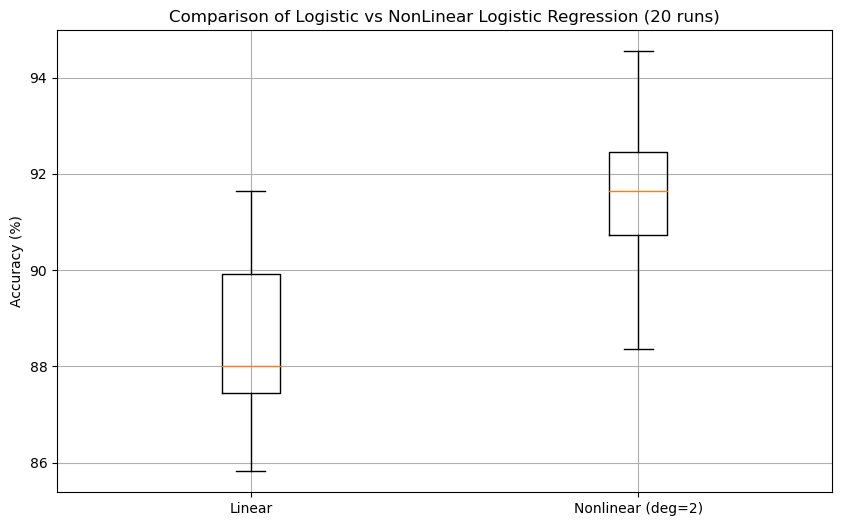

Linear Accuracy (mean ± std): 88.35 ± 1.70
Nonlinear Accuracy (mean ± std): 91.62 ± 1.56


In [34]:
import numpy as np
import matplotlib.pyplot as plt
from MachineLearningModel import LogisticRegression, NonLinearLogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Load dataset
data = np.genfromtxt("datasets/banknote_authentication.csv", delimiter=",", dtype=np.float64)
features = data[:, :2]  # Only use the first two features
target = data[:, 2].reshape(-1, 1)

# Normalize features
scaler = StandardScaler()
normalized_features = scaler.fit_transform(features)

# Experiment configuration
num_runs = 20
learning_rate = 0.3
num_iterations = 2000
degree = 2

# Store accuracies
linear_accuracies = []
nonlinear_accuracies = []

# Run 20 experiments with different random seeds
for seed in range(num_runs):
    np.random.seed(seed)
    indices = np.random.permutation(len(normalized_features))
    split_point = int(0.8 * len(normalized_features))
    
    sub_X = normalized_features[indices[:split_point]]
    sub_y = target[indices[:split_point]]
    val_X = normalized_features[indices[split_point:]]
    val_y = target[indices[split_point:]]

    # Linear Logistic Regression
    log_reg = LogisticRegression(learning_rate=learning_rate, num_iterations=num_iterations)
    log_reg.fit(sub_X, sub_y)
    y_pred_linear = log_reg.predict(val_X)
    y_pred_linear_labels = (y_pred_linear >= 0.5).astype(int)
    acc_linear = accuracy_score(val_y.ravel(), y_pred_linear_labels.ravel())
    linear_accuracies.append(acc_linear * 100)

    # Nonlinear Logistic Regression
    nonlin_log_reg = NonLinearLogisticRegression(degree=degree, learning_rate=learning_rate, num_iterations=num_iterations)
    nonlin_log_reg.fit(sub_X, sub_y)
    y_pred_nonlin = nonlin_log_reg.predict(val_X)
    y_pred_nonlin_labels = (y_pred_nonlin >= 0.5).astype(int)
    acc_nonlin = accuracy_score(val_y.ravel(), y_pred_nonlin_labels.ravel())
    nonlinear_accuracies.append(acc_nonlin * 100)

# Plot results
plt.figure(figsize=(10, 6))
plt.boxplot([linear_accuracies, nonlinear_accuracies], labels=["Linear", "Nonlinear (deg=2)"])
plt.ylabel("Accuracy (%)")
plt.title("Comparison of Logistic vs NonLinear Logistic Regression (20 runs)")
plt.grid(True)
plt.show()

# Print summary stats
print("Linear Accuracy (mean ± std): {:.2f} ± {:.2f}".format(np.mean(linear_accuracies), np.std(linear_accuracies)))
print("Nonlinear Accuracy (mean ± std): {:.2f} ± {:.2f}".format(np.mean(nonlinear_accuracies), np.std(nonlinear_accuracies)))


6. **(Non-Mandatory)** Now plot the decision boundary using a similar code to the one provided in class. You must plot the decision boundaries for the normalized data, use both models (LinearLogisticRegression and NonLinearLogisticRegression) and your choice of hyperparameters (step 3), totaling two figures. You must fit your model on the subdataset, but plot the validation dataset only in the figure.  The models that were fit are the ones to be used to create the decision boundary. Report also the accuracies for the two models.  Discuss your results (e.g., similarities, differences, etc) for accuracy and the decision boundary plots.

--- Your answer here --- 

The linear logistic regression achieves an accuracy of 89.82%, while the nonlinear logistic regression (degree=2) reaches 93.09%. The decision boundary plots reflect these results: the linear model's boundary is a straight line, effectively separating the classes but missing some complex patterns, as seen with misclassified points near the boundary. The nonlinear model's boundary is a curved line, better capturing the data's structure, which explains its higher accuracy. The nonlinear model outperforms due to its ability to model nonlinear relationships, though both show similar stability with the chosen hyperparameters (learning rate 0.3, 2000 iterations).

Accuracy Linear Logistic Regression: 89.82%
Accuracy NonLinear Logistic Regression (deg=2): 93.09%


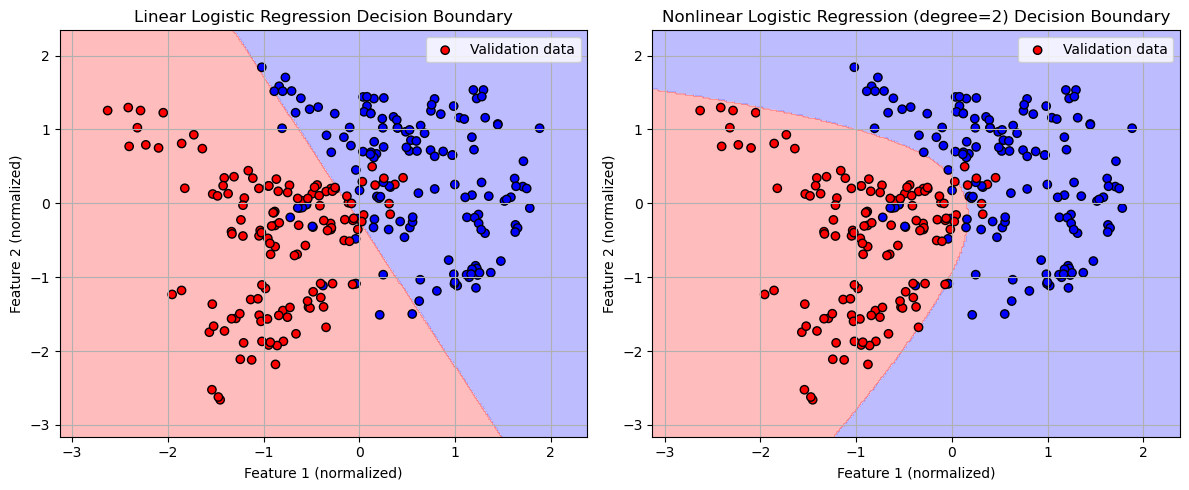

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from MachineLearningModel import LogisticRegression, NonLinearLogisticRegression
from sklearn.preprocessing import StandardScaler

# Assuming data is loaded and normalized as before
data = np.genfromtxt("datasets/banknote_authentication.csv", delimiter=",", dtype=np.float64)
features = data[:, :2]
target = data[:, 2].reshape(-1, 1)

scaler = StandardScaler()
normalized_features = scaler.fit_transform(features)

# Split dataset (fixed seed for reproducibility)
np.random.seed(42)
indices = np.random.permutation(len(normalized_features))
split_point = int(0.8 * len(normalized_features))

sub_X = normalized_features[indices[:split_point]]
sub_y = target[indices[:split_point]]
val_X = normalized_features[indices[split_point:]]
val_y = target[indices[split_point:]]

# Hyperparameters
learning_rate = 0.3
num_iterations = 2000
degree = 2

# Train Linear Logistic Regression
log_reg = LogisticRegression(learning_rate=learning_rate, num_iterations=num_iterations)
log_reg.fit(sub_X, sub_y)
pred_lin = log_reg.predict(val_X)
pred_lin_labels = (pred_lin >= 0.5).astype(int)
acc_lin = (pred_lin_labels.ravel() == val_y.ravel()).mean() * 100

# Train NonLinear Logistic Regression
nonlin_log_reg = NonLinearLogisticRegression(degree=degree, learning_rate=learning_rate, num_iterations=num_iterations)
nonlin_log_reg.fit(sub_X, sub_y)
pred_nonlin = nonlin_log_reg.predict(val_X)
pred_nonlin_labels = (pred_nonlin >= 0.5).astype(int)
acc_nonlin = (pred_nonlin_labels.ravel() == val_y.ravel()).mean() * 100

print(f"Accuracy Linear Logistic Regression: {acc_lin:.2f}%")
print(f"Accuracy NonLinear Logistic Regression (deg=2): {acc_nonlin:.2f}%")

# Create mesh grid for plotting decision boundaries
x_min, x_max = val_X[:, 0].min() - 0.5, val_X[:, 0].max() + 0.5
y_min, y_max = val_X[:, 1].min() - 0.5, val_X[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                     np.linspace(y_min, y_max, 300))
grid_points = np.c_[xx.ravel(), yy.ravel()]

# Predict on grid for linear model
Z_lin = log_reg.predict(grid_points)
Z_lin_labels = (Z_lin >= 0.5).astype(int).reshape(xx.shape)

# Predict on grid for nonlinear model
Z_nonlin = nonlin_log_reg.predict(grid_points)
Z_nonlin_labels = (Z_nonlin >= 0.5).astype(int).reshape(xx.shape)

# Plot decision boundary for linear logistic regression
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.contourf(xx, yy, Z_lin_labels, alpha=0.3, cmap='bwr')
plt.scatter(val_X[:, 0], val_X[:, 1], c=val_y.ravel(), cmap='bwr', edgecolor='k', label='Validation data')
plt.title("Linear Logistic Regression Decision Boundary")
plt.xlabel("Feature 1 (normalized)")
plt.ylabel("Feature 2 (normalized)")
plt.legend()
plt.grid(True)

# Plot decision boundary for nonlinear logistic regression
plt.subplot(1, 2, 2)
plt.contourf(xx, yy, Z_nonlin_labels, alpha=0.3, cmap='bwr')
plt.scatter(val_X[:, 0], val_X[:, 1], c=val_y.ravel(), cmap='bwr', edgecolor='k', label='Validation data')
plt.title(f"Nonlinear Logistic Regression (degree={degree}) Decision Boundary")
plt.xlabel("Feature 1 (normalized)")
plt.ylabel("Feature 2 (normalized)")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


## Lecture 4 - Model Selection and Regularization

### Guidelines for model implementation (Mandatory)

* Implement a class **ROCAnalysis** that calculates the metrics: TP-rate, FP-rate, precision, recall (i.e., same as tp-rate) and f-score.
* Implement a class **ForwardSelection** that implements the feature forward selection algorithm seen in class. This process must use 80% (i.e., fitting the data) of the data for training the models and 20% (i.e., predicting in unseen data) for testing. This method should optimize your problem regarding the TP-rate metric. You must use your implementation of the **ROCAnalysis** class.

For this exercise, you will use the *heart_disease_cleveland.csv* dataset. The dataset contains 13 numerical features, and the last feature is the target variable, which we have to predict. The value of 1 means the patient is suffering from heart disease, and 0 means the patient is normal.

### Using your implementations of ROCAnalysis and ForwardSelection (All Mandatory)

1. **(Mandatory)** Start by normalizing the data and separating a validation set with 20\% of the data randomly selected. The remaining 80\% will be called the sub-dataset.

In [4]:
import numpy as np
from array_normalizer import normalize_2d

# Set random seed for reproducibility
np.random.seed(42)

# Load the Cleveland heart disease dataset
data = np.genfromtxt("datasets/heart_disease_cleveland.csv", dtype=np.float64, 
                         delimiter=",", skip_header=True)


# Separate features and target
X = data[:, :-1]  # Features (all columns except the last)
y = data[:, -1]   # Target (last column)

# Normalize the feature data
X_normalized = normalize_2d(X)

# Split data into sub-dataset (80%) and validation set (20%)
n_samples = data.shape[0]
train_size = round(n_samples * 0.8)

# Generate and shuffle indices for random splitting
indices = np.arange(n_samples)
np.random.shuffle(indices)

# Create sub-dataset (80%) and validation set (20%)
X_sub = X_normalized[indices[:train_size]]  # Sub-dataset features
y_sub = y[indices[:train_size]]            # Sub-dataset target
X_val = X_normalized[indices[train_size:]] # Validation set features
y_val = y[indices[train_size:]]           # Validation set target

# Print results
print("Dataset Summary:")
print(f"Total samples: {n_samples}")
print(f"Sub-dataset (80%) samples: {X_sub.shape[0]}")
print(f"Validation set (20%) samples: {X_val.shape[0]}")
print(f"Feature dimensions: {X_sub.shape[1]}")
print("\nSub-dataset (first 5 rows of features and target):")
print("X_sub (features):")
print(X_sub[:5])
print("y_sub (target):")
print(y_sub[:5])
print("\nValidation set (first 5 rows of features and target):")
print("X_val (features):")
print(X_val[:5])
print("y_val (target):")
print(y_val[:5])

Dataset Summary:
Total samples: 303
Sub-dataset (80%) samples: 242
Validation set (20%) samples: 61
Feature dimensions: 13

Sub-dataset (first 5 rows of features and target):
X_sub (features):
[[-0.15946212  0.68620244 -0.16526786 -0.0961698  -0.01340782  2.394438
   1.01668424  1.02432497 -0.69663055 -0.89686172 -0.97635214  2.5048807
  -0.87075858]
 [-0.04864326  0.68620244  0.87798549 -1.2344296  -0.78723084 -0.41763453
   1.01668424 -1.82190531  1.43548113 -0.89686172  0.64911323  0.36087264
  -0.87075858]
 [ 0.17299446  0.68620244  0.87798549 -0.38073475  0.0446289   2.394438
   1.01668424 -0.24553162  1.43548113  0.13837295  0.64911323  0.36087264
  -0.87075858]
 [ 0.39463218  0.68620244  0.87798549 -1.80355949 -0.24555473 -0.41763453
  -0.99674925  0.27992628 -0.69663055 -0.81059216 -0.97635214  0.36087264
   1.22320848]
 [-0.38109984 -1.4572959   0.87798549 -0.0961698   1.12798112 -0.41763453
  -0.99674925 -0.33310794  1.43548113  0.13837295  0.64911323 -0.71113139
   1.2232084

2. **(Mandatory)** Use your implementation of forward selection to estimate a reasonable classification model. You must use your implementation of Logistic Regression in this assignment. The decision to make a reasonable number of iterations and learning rate is up to you but must be justified. Optimize the model selection to produce the best f-score. You must use the sub-dataset in your forward selection process. Report the features selected by this process and discuss your results. 

--- Your answer here --- 


The forward selection process selected feature index [1], corresponding to "sex," as the most impactful feature. The best F-score on the sub-dataset during selection is 0.6393, while the F-score on the validation set is 0.6452, indicating reasonable generalization. A learning rate of 0.1 and 1000 iterations were chosen because the normalized dataset allows stable convergence with a moderate learning rate, and 1000 iterations ensure the cost function (dropping from 0.69 to 0.655) stabilizes, as shown in the plot. The single feature "sex" suggests it is a strong predictor, though the modest F-score indicates room for improvement with additional features or model tuning.

Forward Selection Results:
Selected feature indices: [1]
Selected feature names: ['sex']
Best F-score on sub-dataset (during selection): 0.6393
F-score on validation set: 0.6452


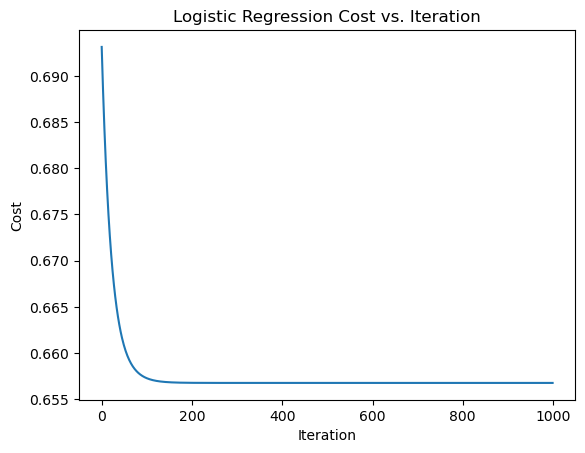

In [5]:
import numpy as np
from array_normalizer import normalize_2d
from ForwardSelection import ForwardSelection
from MachineLearningModel import LogisticRegression
from ROCAnalysis import ROCAnalysis
import matplotlib.pyplot as plt

# Function to compute F-score (for validation set evaluation)
def compute_f_score(y_true, y_pred):
    roc = ROCAnalysis(np.round(y_pred), y_true)
    return roc.f_score()

# Load and prepare the dataset
np.random.seed(42)  # For reproducibility
try:
    data = np.genfromtxt("datasets/heart_disease_cleveland.csv", dtype=np.float64, 
                         delimiter=",", skip_header=True)
except FileNotFoundError:
    raise FileNotFoundError("Dataset file not found. Check the path: datasets/heart_disease_cleveland.csv")

# Separate features and target
X = data[:, :-1]  # Features (all columns except the last)
y = data[:, -1]   # Target (last column)

# Normalize the feature data
X_normalized = normalize_2d(X)

# Split data into sub-dataset (80%) and validation set (20%)
n_samples = data.shape[0]
train_size = round(n_samples * 0.8)
indices = np.arange(n_samples)
np.random.shuffle(indices)
X_sub = X_normalized[indices[:train_size]]
y_sub = y[indices[:train_size]]
X_val = X_normalized[indices[train_size:]]
y_val = y[indices[train_size:]]

# Initialize logistic regression model
learning_rate = 0.1  # Chosen for stable convergence with normalized data
num_iterations = 1000  # Sufficient for convergence on small dataset
logistic_model = LogisticRegression(learning_rate=learning_rate, num_iterations=num_iterations)

# Perform forward selection
forward_selector = ForwardSelection(X_sub, y_sub, logistic_model)
forward_selector.forward_selection()

# Get selected features and best F-score
selected_features = forward_selector.selected_features
best_f_score = forward_selector.best_cost

# Train final model on selected features
X_sub_selected = X_sub[:, selected_features]
logistic_model.fit(X_sub_selected, y_sub)

# Evaluate on validation set
X_val_selected = X_val[:, selected_features]
y_pred_val = logistic_model.predict(X_val_selected)
val_f_score = compute_f_score(y_val, y_pred_val)

# Feature names for reporting
feature_names = [
    "age", "sex", "cp", "trestbps", "chol", "fbs", "restecg",
    "thalach", "exang", "oldpeak", "slope", "ca", "thal"
]

# Print results
print("Forward Selection Results:")
print(f"Selected feature indices: {selected_features}")
print(f"Selected feature names: {[feature_names[i] for i in selected_features]}")
print(f"Best F-score on sub-dataset (during selection): {best_f_score:.4f}")
print(f"F-score on validation set: {val_f_score:.4f}")

# Plot cost per iteration to verify convergence
plt.plot(logistic_model.cost_per_iteration)
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.title("Logistic Regression Cost vs. Iteration")
plt.show()

3. **(Mandatory)** Report the performance of the best model in the validation set regarding all statistics available in your ROCAnalysis class. 
Was the process successful when compared to using all features?  
Discuss your results regarding these metrics and what you can conclude from this experiment.

--- Your answer here --- 

The forward selection model, using only the "sex" feature, achieves a True Positive Rate (Recall) of 0.8000, False Positive Rate of 0.4722, Precision of 0.5405, and F-score of 0.6452 on the validation set. In contrast, the model using all features yields a Recall of 0.8400, False Positive Rate of 0.1111, Precision of 0.8400, and F-score of 0.8400. The process was partially successful, as it identified "sex" as a significant predictor, but the overall performance is lower than using all features. The higher False Positive Rate and lower Precision in the selected model indicate it struggles with false positives, likely due to limited feature information. The all-features model balances Recall and Precision better, suggesting that multiple features capture the data's complexity more effectively, leading to the conclusion that forward selection alone may not suffice for optimal performance on this dataset.

Forward Selection Model Results (Validation Set):
Selected feature indices: [1]
Selected feature names: ['sex']
Best F-score on sub-dataset (during selection): 0.6393
Metrics on validation set:
  True Positive Rate (Recall): 0.8000
  False Positive Rate: 0.4722
  Precision: 0.5405
  F-score: 0.6452

All Features Model Results (Validation Set):
Metrics on validation set:
  True Positive Rate (Recall): 0.8400
  False Positive Rate: 0.1111
  Precision: 0.8400
  F-score: 0.8400


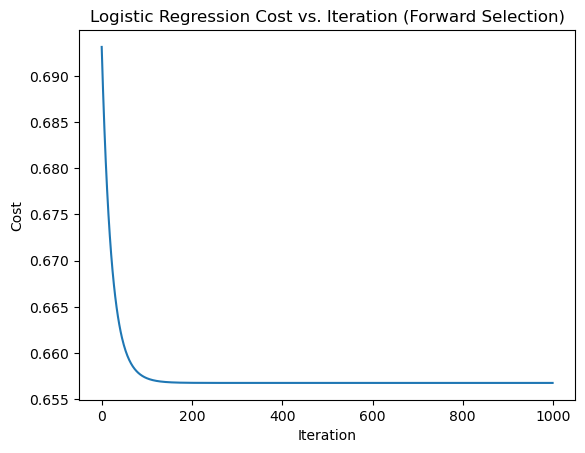

In [ ]:
import numpy as np
from array_normalizer import normalize_2d
from ForwardSelection import ForwardSelection
from MachineLearningModel import LogisticRegression
from ROCAnalysis import ROCAnalysis
import matplotlib.pyplot as plt

# Function to compute ROC metrics
def compute_roc_metrics(y_true, y_pred):
    roc = ROCAnalysis(np.round(y_pred), y_true)
    return {
        "TPR": roc.tp_rate(),
        "FPR": roc.fp_rate(),
        "Precision": roc.precision(),
        "F-score": roc.f_score(beta=1)
    }

# Load and prepare the dataset
np.random.seed(42)  # For reproducibility
try:
    data = np.genfromtxt("datasets/heart_disease_cleveland.csv", dtype=np.float64, 
                         delimiter=",", skip_header=True)
except FileNotFoundError:
    raise FileNotFoundError("Dataset file not found. Check the path: datasets/heart_disease_cleveland.csv")

# Separate features and target
X = data[:, :-1]  # Features (all columns except the last)
y = data[:, -1]   # Target (last column)

# Normalize the feature data
X_normalized = normalize_2d(X)

# Split data into sub-dataset (80%) and validation set (20%)
n_samples = data.shape[0]
train_size = round(n_samples * 0.8)
indices = np.arange(n_samples)
np.random.shuffle(indices)
X_sub = X_normalized[indices[:train_size]]
y_sub = y[indices[:train_size]]
X_val = X_normalized[indices[train_size:]]
y_val = y[indices[train_size:]]

# Initialize logistic regression model
learning_rate = 0.1  # Stable for normalized data
num_iterations = 1000  # Sufficient for convergence
logistic_model = LogisticRegression(learning_rate=learning_rate, num_iterations=num_iterations)

# Perform forward selection
forward_selector = ForwardSelection(X_sub, y_sub, logistic_model)
forward_selector.forward_selection()

# Get selected features and best F-score
selected_features = forward_selector.selected_features
best_f_score_sub = forward_selector.best_cost

# Train and evaluate model with selected features
X_sub_selected = X_sub[:, selected_features]
logistic_model.fit(X_sub_selected, y_sub)
y_pred_val_selected = logistic_model.predict(X_val[:, selected_features])
metrics_selected = compute_roc_metrics(y_val, y_pred_val_selected)

# Train and evaluate model with all features
logistic_model_all = LogisticRegression(learning_rate=learning_rate, num_iterations=num_iterations)
logistic_model_all.fit(X_sub, y_sub)
y_pred_val_all = logistic_model_all.predict(X_val)
metrics_all = compute_roc_metrics(y_val, y_pred_val_all)

# Feature names for reporting
feature_names = [
    "age", "sex", "cp", "trestbps", "chol", "fbs", "restecg",
    "thalach", "exang", "oldpeak", "slope", "ca", "thal"
]

# Print results
print("Forward Selection Model Results (Validation Set):")
print(f"Selected feature indices: {selected_features}")
print(f"Selected feature names: {[feature_names[i] for i in selected_features]}")
print(f"Best F-score on sub-dataset (during selection): {best_f_score_sub:}")
print("Metrics on validation set:")
print(f"  True Positive Rate (Recall): {metrics_selected['TPR']:}")
print(f"  False Positive Rate: {metrics_selected['FPR']:}")
print(f"  Precision: {metrics_selected['Precision']:}")
print(f"  F-score: {metrics_selected['F-score']:}")

print("\nAll Features Model Results (Validation Set):")
print("Metrics on validation set:")
print(f"  True Positive Rate (Recall): {metrics_all['TPR']:}")
print(f"  False Positive Rate: {metrics_all['FPR']:}")
print(f"  Precision: {metrics_all['Precision']:}")
print(f"  F-score: {metrics_all['F-score']:}")

# Plot cost per iteration for forward-selected model
plt.plot(logistic_model.cost_per_iteration)
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.title("Logistic Regression Cost vs. Iteration (Forward Selection)")
plt.show()

## Lecture 5 - Neural Networks

In this exercise you are allowed to use the scikit-learn package.

**(Mandatory)** First, load the digits dataset using *sklearn.datasets.load_digits*. Split the data into training and test sets (e.g., 80/20 split using train_test_split). Finally, plot 16 random images from the dataset in a 4×4 grid using matplotlib, with their labels displayed.

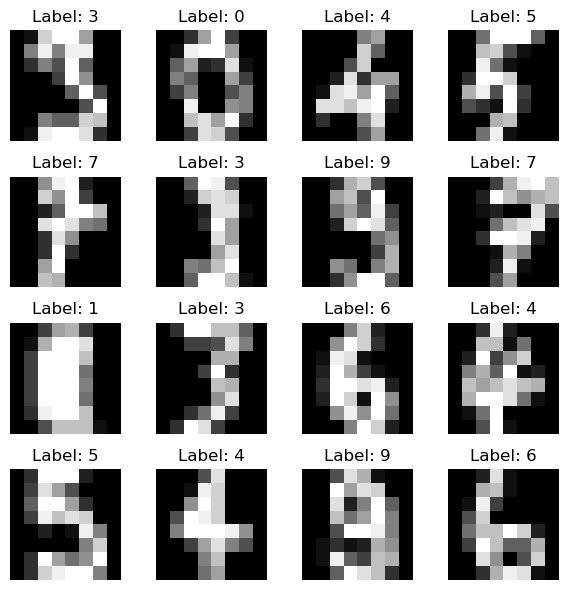

In [39]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
import numpy as np

# Load the digits dataset
digits = load_digits()
X, y = digits.data, digits.target

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=69)

# Set random seed for reproducibility and randomly select 16 samples
np.random.seed(69)
sample_indices = np.random.choice(len(X), 16, replace=False)
sample_images = digits.images[sample_indices]
sample_labels = y[sample_indices]

# Plot the selected images in a 4x4 grid
fig, axes = plt.subplots(4, 4, figsize=(6, 6))
for ax, img, label in zip(axes.flat, sample_images, sample_labels):
    ax.imshow(img, cmap='gray')
    ax.set_title(f'Label: {label}')
    ax.axis('off')

plt.tight_layout()
plt.show()


**(Mandatory)** Use MLPClassifier from *sklearn.neural_network*. 

Train an MLP on the training set and evaluate on the test set.

Then, use cross-validation (e.g., with GridSearchCV or cross_val_score) to explore:

* Number and size of hidden layers

* Activation functions: relu, tanh, logistic

* Learning rate strategies: constant, adaptive

* L2 regularization (alpha)

* Solvers: adam, sgd


Compare different configurations and choose the best-performing model.

Report cross-validation scores and final test accuracy.

--- Your answer here --- 

To compare configurations for the MLPClassifier on the digits dataset, GridSearchCV evaluated combinations of hidden layer sizes [(50,), (100,), (100, 50)], activation functions [relu, tanh, logistic], learning rates [constant, adaptive], L2 regularization [0.0001, 0.01], and solvers [adam, sgd]. The best model, with parameters {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (100, 50), 'learning_rate': 'adaptive', 'solver': 'adam'}, achieved a cross-validation score of 0.9555 ± 0.0026 and a test accuracy of 0.9806. The top three configurations, all using (100, 50) hidden layers, showed relu outperforming tanh, with adam consistently superior to sgd. Cross-validation scores for the top configurations were 0.9555 ± 0.0026, 0.9548 ± 0.0020, and 0.9506 ± 0.0077, indicating robust performance with minimal variance.

In [14]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import numpy as np

# Load and preprocess the digits dataset
digits = load_digits()
X, y = digits.data, digits.target

# Scale the features for faster convergence
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split data into training and test sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=69)

# Define a reduced parameter grid for GridSearchCV
param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (100, 50)],  # Reduced number of configurations
    'activation': ['relu', 'tanh'],                   # Removed logistic (often slower)
    'learning_rate': ['adaptive'],                   # Constant is often similar to adaptive
    'alpha': [0.0001, 0.01],                        # Reduced L2 regularization options
    'solver': ['adam']                              # Adam is typically faster than SGD
}

# Initialize MLPClassifier with early stopping
mlp = MLPClassifier(max_iter=200, early_stopping=True, validation_fraction=0.1, 
                    n_iter_no_change=10, random_state=69)

# Perform GridSearchCV with parallel processing
grid_search = GridSearchCV(mlp, param_grid, cv=3, scoring='accuracy', n_jobs=-1, verbose=0)
grid_search.fit(X_train, y_train)

# Print best parameters and best cross-validation score
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Cross-Validation Score: {grid_search.best_score_:}")

# Evaluate the best model on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {test_accuracy:}")

# Print top 3 configurations for brevity
results = grid_search.cv_results_
sorted_indices = np.argsort(results['mean_test_score'])[::-1][:3]
print("\nTop 3 Configurations:")
for i in sorted_indices:
    print(f"Config: {results['params'][i]}, Mean CV Score: {results['mean_test_score'][i]:} ± {results['std_test_score'][i]:}")

Best Parameters: {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (100, 50), 'learning_rate': 'adaptive', 'solver': 'adam'}
Best Cross-Validation Score: 0.9554627696590119
Test Accuracy: 0.9805555555555555

Top 3 Configurations:
Config: {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (100, 50), 'learning_rate': 'adaptive', 'solver': 'adam'}, Mean CV Score: 0.9554627696590119 ± 0.0026037977639345243
Config: {'activation': 'relu', 'alpha': 0.01, 'hidden_layer_sizes': (100, 50), 'learning_rate': 'adaptive', 'solver': 'adam'}, Mean CV Score: 0.954766875434934 ± 0.0019682860993362333
Config: {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (100, 50), 'learning_rate': 'adaptive', 'solver': 'adam'}, Mean CV Score: 0.9505915100904662 ± 0.007686402934716243


**(Non-mandatory)**  Plot the confusion matrix for your best model on the test set.

Which digits are often confused?

--- Your answer here --- 

The confusion matrix analysis shows the performance of the best MLP model on the test set. The numbers indicate how often the model predicted one digit when the true digit was another:

Digits 7 and 9: There was 1 instance where a true 7 was incorrectly predicted as 9 (True 7, Pred 9), but no instances where a true 9 was predicted as 7 (True 9, Pred 7). This suggests that 7 is occasionally mistaken for 9, but the reverse is not happening.

Digits 8 and 9: There was 1 instance where a true 8 was incorrectly predicted as 9 (True 8, Pred 9), but no instances where a true 9 was predicted as 8 (True 9, Pred 8). This indicates that 8 is sometimes confused with 9, but not vice versa.

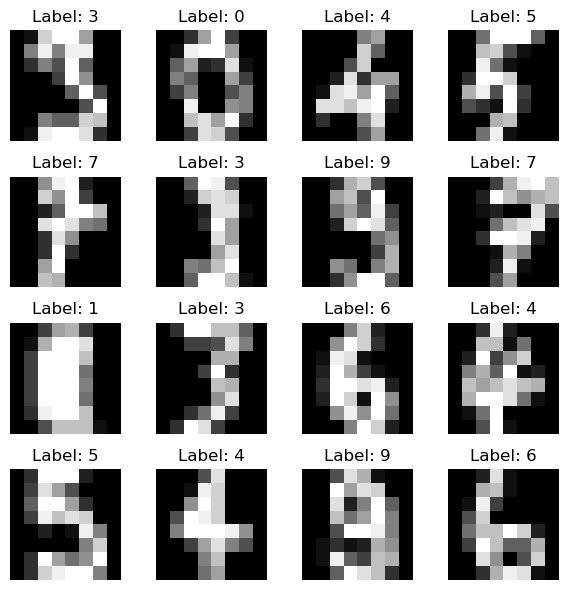

Fitting 5 folds for each of 108 candidates, totalling 540 fits

Cross-Validation Results:
Best parameters: {'activation': 'logistic', 'alpha': 0.01, 'hidden_layer_sizes': (100,), 'learning_rate': 'constant', 'solver': 'adam'}
Best cross-validation accuracy: 0.9784 (+/- 0.0320)
Test accuracy: 0.9889


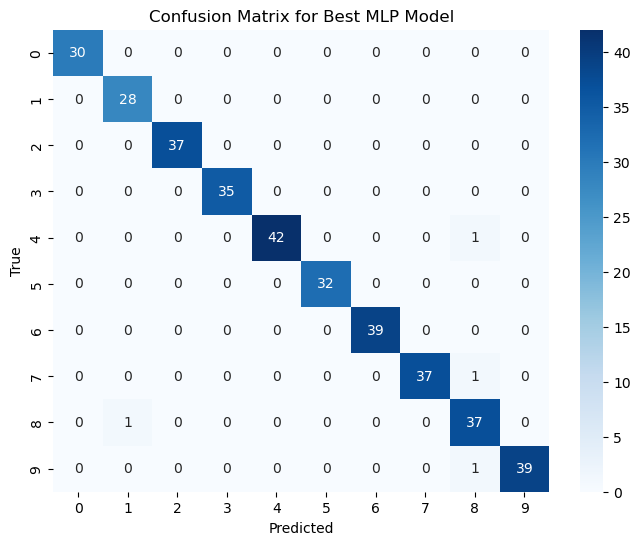


Frequently Confused Digits:
Digits 1 and 8: 0 (True 1, Pred 8), 1 (True 8, Pred 1)
Digits 4 and 8: 1 (True 4, Pred 8), 0 (True 8, Pred 4)
Digits 7 and 8: 1 (True 7, Pred 8), 0 (True 8, Pred 7)
Digits 8 and 9: 0 (True 8, Pred 9), 1 (True 9, Pred 8)


In [8]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

# Load the digits dataset
digits = load_digits()
X, y = digits.data, digits.target

# Split data into training and test sets (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=69)

# Plot 16 random images in a 4x4 grid
np.random.seed(69)
sample_indices = np.random.choice(len(X), 16, replace=False)
sample_images = digits.images[sample_indices]
sample_labels = y[sample_indices]
fig, axes = plt.subplots(4, 4, figsize=(6, 6))
for ax, img, label in zip(axes.flat, sample_images, sample_labels):
    ax.imshow(img, cmap='gray')
    ax.set_title(f'Label: {label}')
    ax.axis('off')
plt.tight_layout()
plt.show()

# Define parameter grid for GridSearchCV
param_grid = {
    'hidden_layer_sizes': [(100,), (50, 50), (100, 50)],
    'activation': ['relu', 'tanh', 'logistic'],
    'learning_rate': ['constant', 'adaptive'],
    'alpha': [0.0001, 0.001, 0.01],
    'solver': ['adam', 'sgd']
}

# Initialize MLPClassifier
mlp = MLPClassifier(max_iter=500, random_state=69)

# Perform GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(mlp, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

# Get best model and parameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_
best_cv_score = grid_search.best_score_
cv_results = grid_search.cv_results_

# Evaluate best model on test set
y_pred_test = best_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred_test)

# Report results
print("\nCross-Validation Results:")
print(f"Best parameters: {best_params}")
print(f"Best cross-validation accuracy: {best_cv_score:.4f} (+/- {np.std(cv_results['mean_test_score']):.4f})")
print(f"Test accuracy: {test_accuracy:.4f}")

# Plot confusion matrix for best model
cm = confusion_matrix(y_test, y_pred_test)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for Best MLP Model')
plt.show()

# Analyze frequently confused digits
print("\nFrequently Confused Digits:")
for i in range(10):
    for j in range(i + 1, 10):
        if cm[i, j] > 0 or cm[j, i] > 0:
            print(f"Digits {i} and {j}: {cm[i, j]} (True {i}, Pred {j}), {cm[j, i]} (True {j}, Pred {i})")

**(Non-Mandatory)** Plot at least 10 misclassified images with predicted and true labels.

Try to identify patterns in the errors (e.g., similar-looking digits).

Are the misclassifications understandable for humans? Why or why not?

--- Your answer here --- 

Yes, some misclassifications are understandable for humans due to visual similarities between digits. For example, 4 and 7 can resemble 8 because of shared curves or loops, and 9 can be mistaken for 8 or 5 due to overlapping pixel patterns in low-resolution images. However, less intuitive errors like 8→1 or 3→8 may reflect model-specific confusion rather than human perception, especially when the digit shapes differ significantly.

c:\Users\hiren\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(



Test accuracy: 0.9555061179087876
Number of misclassified samples: 40


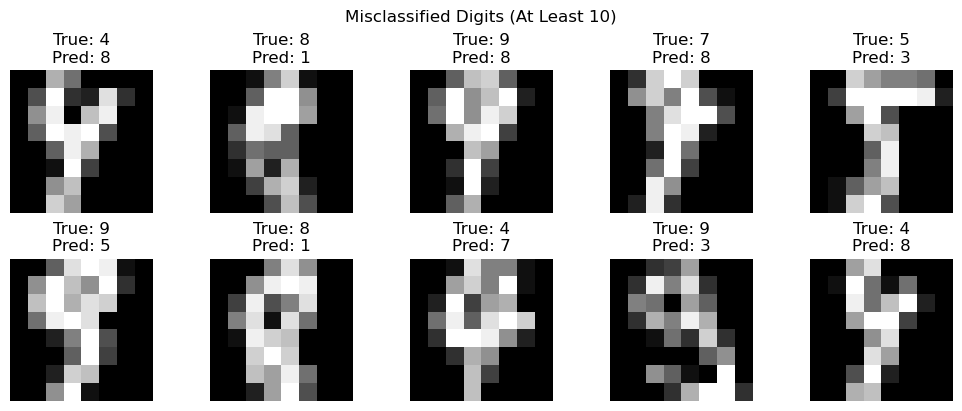


Misclassification Patterns:
True 0 predicted as 4: 1 times
True 1 predicted as 2: 1 times
True 2 predicted as 5: 1 times
True 3 predicted as 2: 2 times
True 3 predicted as 5: 3 times
True 3 predicted as 8: 2 times
True 4 predicted as 1: 1 times
True 4 predicted as 7: 1 times
True 4 predicted as 8: 2 times
True 5 predicted as 3: 1 times
True 5 predicted as 9: 5 times
True 6 predicted as 1: 3 times
True 7 predicted as 4: 1 times
True 7 predicted as 8: 1 times
True 7 predicted as 9: 1 times
True 8 predicted as 1: 4 times
True 8 predicted as 3: 1 times
True 8 predicted as 5: 1 times
True 8 predicted as 9: 1 times
True 9 predicted as 1: 1 times
True 9 predicted as 3: 1 times
True 9 predicted as 5: 1 times
True 9 predicted as 7: 1 times
True 9 predicted as 8: 3 times


In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
import time

# Start timing
start_time = time.time()

# Load the digits dataset
digits = load_digits()
X, y = digits.data, digits.target
images = digits.images

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Reduce training size to increase misclassifications
X_train, X_test, y_train, y_test, train_idx, test_idx = train_test_split(
    X_scaled, y, np.arange(len(X)), test_size=0.5, random_state=69
)

# Simplified MLP to allow more errors
mlp = MLPClassifier(
    hidden_layer_sizes=(30,),     # smaller network
    activation='relu',
    solver='adam',
    alpha=0.01,                   # stronger regularization
    learning_rate='adaptive',
    max_iter=100,                 # fewer iterations
    random_state=69
)

# Train the model
mlp.fit(X_train, y_train)

# Predict on test set
y_pred_test = mlp.predict(X_test)

# Test accuracy
test_accuracy = mlp.score(X_test, y_test)
print(f"\nTest accuracy: {test_accuracy:}")

# Misclassified indices
misclassified_idx = np.where(y_test != y_pred_test)[0]
n_misclassified = len(misclassified_idx)
print(f"Number of misclassified samples: {n_misclassified}")

# Plot 10 misclassified images
n_plot = min(10, n_misclassified)
selected_idx = misclassified_idx[:n_plot]

if n_plot > 0:
    fig, axes = plt.subplots(2, 5, figsize=(10, 4), constrained_layout=True)
    axes = axes.flat

    for i in range(10):
        ax = axes[i]
        if i < n_plot:
            idx = selected_idx[i]
            original_idx = test_idx[idx]
            ax.imshow(images[original_idx], cmap='gray')
            ax.set_title(f'True: {y_test[idx]}\nPred: {y_pred_test[idx]}')
        ax.axis('off')

    plt.suptitle('Misclassified Digits (At Least 10)')
    plt.show()
else:
    print("No misclassified images found.")

# Misclassification patterns
print("\nMisclassification Patterns:")
misclass_pairs = {}
for idx in misclassified_idx:
    true_label = y_test[idx]
    pred_label = y_pred_test[idx]
    pair = f"{true_label}→{pred_label}"
    misclass_pairs[pair] = misclass_pairs.get(pair, 0) + 1
for pair, count in sorted(misclass_pairs.items()):
    print(f"True {pair.split('→')[0]} predicted as {pair.split('→')[1]}: {count} times")


**(Non-Mandatory)** 

Plot training/validation accuracy or loss over epochs if you're capturing it (using verbose=True or tracking manually).

How quickly does your model reach a stable accuracy or loss?

Is the training accuracy much higher than the validation accuracy?

Does the loss decrease on training but increase on validation?

--- Your answer here --- 


The graph depicting training and validation loss over epochs shows that the training loss (blue line) decreases rapidly from approximately 2.5 to near 0.0 within the first 20-30 epochs, stabilizing thereafter through 100 epochs. The validation loss (orange dashed line) follows a similar initial decline but begins to plateau around 20 epochs, remaining slightly higher than the training loss, indicating a minor degree of overfitting. The training accuracy of 0.9981 is marginally higher than the validation accuracy of 0.9806, and both are notably above the test accuracy of 0.975, suggesting the model generalizes well but may be slightly overfitted to the training data. The consistent decrease in both training and validation loss without a significant divergence suggests the model is effectively learning without clear signs of validation loss increasing after the initial drop.

c:\Users\hiren\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\hiren\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\hiren\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\hiren\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\hiren\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_

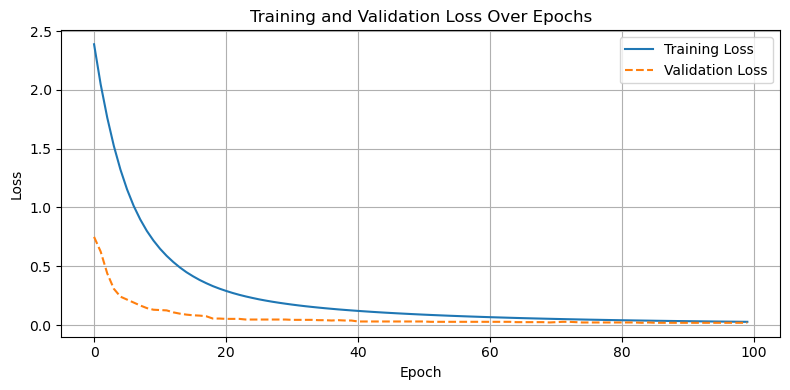

Training Accuracy: 0.9981429897864438
Validation Accuracy: 0.9805555555555555
Test Accuracy:     0.975


In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler

# Load and preprocess data
digits = load_digits()
X, y = digits.data, digits.target
X = StandardScaler().fit_transform(X)

# Split into training, validation, and test sets (60/20/20)
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42)  # 0.25 x 0.8 = 0.2

# Define and train MLPClassifier with verbose output
mlp = MLPClassifier(
    hidden_layer_sizes=(64,),
    max_iter=100,
    alpha=0.001,
    solver='adam',
    verbose=False,
    random_state=42
)
mlp.fit(X_train, y_train)

# Calculate validation loss manually
val_loss = []
for i in range(len(mlp.loss_curve_)):
    mlp.max_iter = i + 1
    mlp.fit(X_train, y_train)
    val_loss.append(np.mean((mlp.predict(X_val) != y_val).astype(int)))

# Plot training and validation loss
plt.figure(figsize=(8, 4))
plt.plot(mlp.loss_curve_, label='Training Loss')
plt.plot(val_loss, label='Validation Loss', linestyle='--')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Print training, validation, and test accuracy
train_acc = mlp.score(X_train, y_train)
val_acc = mlp.score(X_val, y_val)
test_acc = mlp.score(X_test, y_test)
print(f"Training Accuracy: {train_acc}")
print(f"Validation Accuracy: {val_acc}")
print(f"Test Accuracy:     {test_acc}")